# 들어가는 말

## 분석 배경
- (가상 기업) **포스코 리빙 & 하우징**은 보스턴 대도시 권역의 아파트 시장에 진출했다.
- **포스코 찰스 리버뷰 타운(POSCO Charlse Rivew-View Town)** 은 **포스코 리빙 & 하우징**의 첫 번째 프리미엄 아파트로서, 찰스 강이 보이는 구역에 완공을 앞두고 있다.
- **마케팅 팀**은 분양 행사를 성공적으로 개최하기 위하여, 보스턴 시민들에게 마케팅 캠페인(***The River Looks Good***) 을 펼치려고 한다.

## 문제 설정
- 그런데 위의 카피를 모든 구역에 광고할 수는 없으며, *백인 밀집 구역*과 *백인/흑인 혼합 구역* 중 한 곳을 선택해야 한다.
- 마케팅 팀은 **보스턴 주택 통계**를 활용해 **마케팅 카피를 광고할 지역**을 선별하고자 한다.
- 강이 보이는 조망은 *백인 밀집 구역*과 *백인/흑인 혼합 구역* 중 어느 곳에서 특별한 의미를 지닐까?

# 사전 작업
## 라이브러리 불러오기

In [46]:
wd = '/home/pirl/BDAI-정덕성/statistics/Big Data 2/data/'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분할
from sklearn.model_selection import train_test_split

# 예측 모형
import statsmodels.formula.api as smf # 선형회귀
from sklearn.tree import DecisionTreeRegressor # 의사결정트리
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트
from sklearn.ensemble import GradientBoostingRegressor #그래디언트부스팅
from sklearn.model_selection import GridSearchCV # GridSearchCV

# Regression libraries
from statsmodels.api import qqplot, add_constant # qqplot, constatns항 추가
from statsmodels.tools.eval_measures import rmse # rmse: 평가함수

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


%matplotlib inline
matplotlib.rc('font', family = 'NanumBarunGothic')

## 데이터 불러오기

In [2]:
file = wd + 'BOSTON_HOUSING.csv'
df_raw = pd.read_csv(file, engine='python', encoding='euc-kr')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
MEDV       506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


## 데이터 형태 확인
- 506개 표본, 14개 변수
- 결측치 없음

# 탐색적 분석

In [3]:
df_raw.describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,22.533,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,9.197,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,5.000,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,17.025,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,21.200,0.257,0.000,9.690,0.000,0.538,6.209,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,25.000,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,50.000,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970


In [4]:
df_raw.corr(method='pearson').round(2)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.00,-0.39,0.36,-0.48,0.18,-0.43,0.70,-0.38,0.25,-0.38,-0.47,-0.51,0.33,-0.74
CRIM,-0.39,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,0.36,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,-0.48,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,0.18,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,-0.43,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,0.70,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,-0.38,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,0.25,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,-0.38,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49


## 목표변수 검토
### 변수 정의
- 자가 주택의 주택가격 중앙값

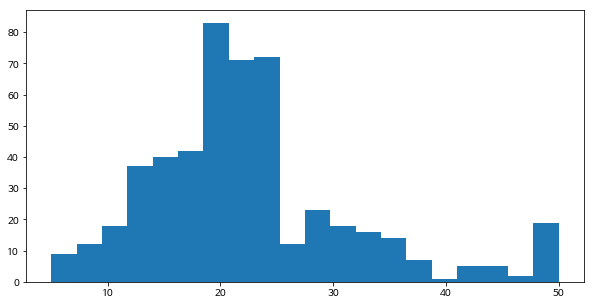

In [5]:
df_raw['MEDV'].hist(bins=20,figsize=(10,5),grid=False)

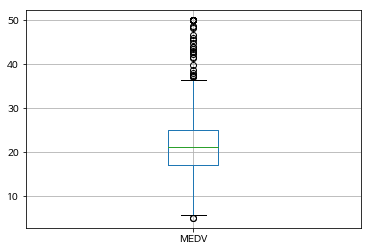

In [6]:
df_raw.boxplot(column='MEDV')

### 목표변수 이상치 제거
- `MEDV` < 40 인 관측치만 보존
- 분석 대상 표본의 개수: N = 475

In [7]:
# IQR
Q1 = df_raw['MEDV'].quantile(0.25)
Q3 = df_raw['MEDV'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
# df_short = df_raw.query('(@Q1 - 1.5 * @IQR) <= MEDV <= (@Q3 + 1.5 * @IQR)')
df_short = df_raw
df_short.describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,22.533,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,9.197,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,5.000,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,17.025,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,21.200,0.257,0.000,9.690,0.000,0.538,6.209,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,25.000,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,50.000,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970


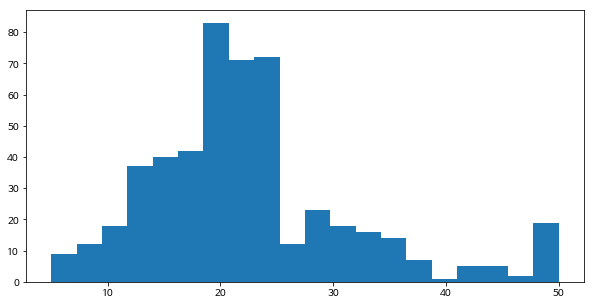

In [8]:
df_short['MEDV'].hist(bins=20,figsize=(10,5),grid=False)

## 설명변수 검토

1) 주거 환경: (+) 찰스강 조망; (-) 범죄율, 산화질소 농도, 교사 1명당 학생 수, 비소매업 산업용지 비중
    
2) 주택 특성: (+) 주거용지 비중, 주택 평균 크기(방 개수)

          (-) 주택 노후도(자가 주택 중 1940년 이전에 지어진 주택의 비중, 혹은 지어진 지 30년 이상된 주택 비중)
    
3) 주민 구성: (-) 흑인 거주민 비중, 저소득층 비중

4) 접근성: (+) 주요 업무지역과의 거리, 방사형 고속도로 접근지수

(+), (-) 부호는 *Harrison and Rubinfeld (1978)* 참고


### 흑인 비중 추산치
- `B` 변수를 활용하여 구역 내 거주민 중 흑인의 비중을 역추산

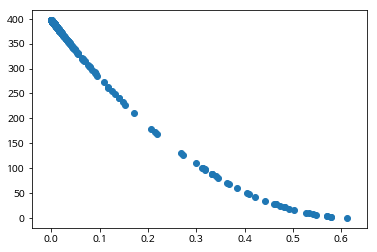

In [9]:
temp = df_short['B']
# 흑인 비중 = temp_bk
temp_bk = .63 - np.sqrt(temp/1000)

# B 변수와 구역 내 흑인 거주 비중 간 산점도
plt.scatter(temp_bk, temp)

In [10]:
# DataFrame에 흑인 비중 변수 추가, 소수점 6째자리까지 추산
df_short['B'] = temp_bk.round(6) * 100
df_short.rename(columns={"B": "Bk"}, inplace=True)
df_short.describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,22.533,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,4.370,12.653
std,9.197,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,11.379,7.141
min,5.000,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.000,1.730
25%,17.025,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,0.054,6.950
50%,21.200,0.257,0.000,9.690,0.000,0.538,6.209,77.500,3.207,5.000,330.000,19.050,0.435,11.360
75%,25.000,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,1.732,16.955
max,50.000,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,61.211,37.970


#### `B`와 구역 내 흑인 비중(`Bk`) 간의 관계
- 흑인 거주 비중(추산치)이 높을수록 B 값은 낮아짐
    - Harrison and Rubinfeld (1978)에 따르면, 흑인 거주 비중은 '선호되지 않는 이웃 특성(혹은 주거 환경)'으로서 주택 가격과 음(-)의 상관관계
- B 변수는 흑인 거주 비중을 지수함수로 변환한 것
    - 흑인 비중은 주택 가치에 대해 기하급수적으로 부정적인 영향

#### 표본 분할: No-Black & Mixed
- 흑인 거주 여부에 따라 **No-Black(NB) Towns, Mixed(MX) Towns**로 표본 분할
- `df_short`: 분석 표본 (주택가격(`MEDV`) 이상치 제거), N=475
- `df_noblack`: 흑인 비중 = 0인 구역, n=120
- `df_mixed`: 흑인 비중 > 0인 구역, n=355

In [11]:
### No-Black Towns: 흑인 비중 = 0인 구역
df_noblack = df_short.query('Bk==0')
df_noblack.describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT
count,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.0,121.000
mean,21.060,4.214,12.116,10.507,0.033,0.543,6.163,65.961,3.868,8.975,391.992,18.759,0.0,13.193
std,7.572,10.434,23.814,6.495,0.180,0.113,0.642,27.609,2.006,8.573,169.104,1.796,0.0,8.121
min,5.000,0.006,0.000,0.740,0.000,0.398,4.138,8.400,1.137,1.000,193.000,12.600,0.0,2.980
25%,15.600,0.062,0.000,5.190,0.000,0.448,5.794,42.300,2.168,4.000,273.000,17.800,0.0,6.720
50%,20.600,0.173,0.000,8.140,0.000,0.515,6.142,67.800,3.495,5.000,307.000,19.200,0.0,10.590
75%,23.900,3.321,12.500,18.100,0.000,0.624,6.490,94.700,5.401,8.000,469.000,20.200,0.0,17.920
max,42.800,88.976,95.000,27.740,1.000,0.871,8.259,100.000,9.188,24.000,711.000,21.200,0.0,37.970


In [12]:
### Mixed Towns: 흑인 비중 > 0인 구역
df_mixed = df_short.query('Bk>0')
df_mixed.describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT
count,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000
mean,22.996,3.425,11.127,11.335,0.081,0.558,6.323,69.396,3.772,9.730,413.343,18.360,5.743,12.483
std,9.614,7.945,23.192,6.968,0.272,0.117,0.717,28.302,2.138,8.752,168.255,2.262,12.743,6.807
min,5.000,0.009,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.038,1.730
25%,17.100,0.089,0.000,5.130,0.000,0.453,5.896,46.700,2.088,4.000,284.000,16.900,0.292,7.220
50%,21.400,0.318,0.000,9.900,0.000,0.538,6.226,79.900,3.099,5.000,345.000,18.700,0.811,11.450
75%,26.400,3.678,12.500,18.100,0.000,0.624,6.642,93.900,5.118,24.000,666.000,20.200,2.986,16.740
max,50.000,73.534,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,61.211,36.980


#### 부분 표본별 기초통계량

In [13]:
df_noblack.describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT
count,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.000,121.0,121.000
mean,21.060,4.214,12.116,10.507,0.033,0.543,6.163,65.961,3.868,8.975,391.992,18.759,0.0,13.193
std,7.572,10.434,23.814,6.495,0.180,0.113,0.642,27.609,2.006,8.573,169.104,1.796,0.0,8.121
min,5.000,0.006,0.000,0.740,0.000,0.398,4.138,8.400,1.137,1.000,193.000,12.600,0.0,2.980
25%,15.600,0.062,0.000,5.190,0.000,0.448,5.794,42.300,2.168,4.000,273.000,17.800,0.0,6.720
50%,20.600,0.173,0.000,8.140,0.000,0.515,6.142,67.800,3.495,5.000,307.000,19.200,0.0,10.590
75%,23.900,3.321,12.500,18.100,0.000,0.624,6.490,94.700,5.401,8.000,469.000,20.200,0.0,17.920
max,42.800,88.976,95.000,27.740,1.000,0.871,8.259,100.000,9.188,24.000,711.000,21.200,0.0,37.970


In [14]:
df_mixed.describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT
count,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000,385.000
mean,22.996,3.425,11.127,11.335,0.081,0.558,6.323,69.396,3.772,9.730,413.343,18.360,5.743,12.483
std,9.614,7.945,23.192,6.968,0.272,0.117,0.717,28.302,2.138,8.752,168.255,2.262,12.743,6.807
min,5.000,0.009,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.038,1.730
25%,17.100,0.089,0.000,5.130,0.000,0.453,5.896,46.700,2.088,4.000,284.000,16.900,0.292,7.220
50%,21.400,0.318,0.000,9.900,0.000,0.538,6.226,79.900,3.099,5.000,345.000,18.700,0.811,11.450
75%,26.400,3.678,12.500,18.100,0.000,0.624,6.642,93.900,5.118,24.000,666.000,20.200,2.986,16.740
max,50.000,73.534,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,61.211,36.980


## 설명 변수 영향 요인 탐색
- 랜덤포레스트, 그래디언트 부스팅 모형을 추정하여 목표변수와 연관성 높은 변수 탐색
- GridSearch 기법으로 모형의 hyper-parameters 선정

### 랜덤 포레스트
- 분석 표본(N=466)
- train:test = 7:3 = 332:143
#### 모형 Parameter 탐색(GridSearch)

In [15]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_short.drop(['MEDV'], axis=1),
                                                                df_short['MEDV'],
                                                                test_size = 0.3, random_state=1234)
v_feature_name = df_train_x.columns
print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(354, 13)
train data Y size:(354,)
test data X size:(152, 13)
test data Y size:(152,)


In [16]:
rf_estimator = RandomForestRegressor(random_state=1234)

# Param set
param_grid = {'n_estimators': range(10,110,10),
              'max_depth': range(5,11),
              'min_samples_leaf': range(2,7),
              'min_samples_split': range(4,16,2)}

grid_rf = GridSearchCV(rf_estimator, param_grid, scoring='r2', n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(10, 110, 10), 'max_depth': range(5, 11), 'min_samples_leaf': range(2, 7), 'min_samples_split': range(4, 16, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [17]:
print('Best Model:\n{}\n'.format(grid_rf.best_estimator_))
print('Best Params:\n{}\n'.format(grid_rf.best_params_))
print('Best Score: {}'.format(grid_rf.best_score_.round(3)))
print('Test Score: {:.3f}'.format(grid_rf.score(df_test_x, df_test_y)))

Best Model:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

Best Params:
{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 20}

Best Score: 0.807
Test Score: 0.899


#### 변수 중요도

In [18]:
# 변수 중요도
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = grid_rf.best_estimator_.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.475
5,RM,0.336
7,DIS,0.069
0,CRIM,0.030
10,PTRATIO,0.025
6,AGE,0.018
4,NOX,0.016
11,Bk,0.012
9,TAX,0.011
2,INDUS,0.005


Text(0, 0.5, '변수')

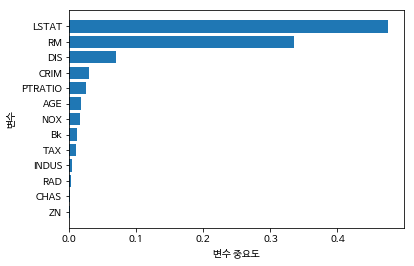

In [19]:
# 변수 중요도 수평 바
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

### 그래디언트 부스팅
#### 모형 Parameter 탐색(GridSearch)

In [20]:
gb_estimator = GradientBoostingRegressor(random_state=1234)
lrate = [lrate/10 for lrate in range(1,11)]
# Param set
param_grid = {'n_estimators': range(10,110,10),
              'max_depth': range(5,11),
              'min_samples_leaf': range(2,7),
              'min_samples_split': range(4,16,2),
             'learning_rate': lrate}

grid_gb = GridSearchCV(gb_estimator, param_grid, scoring='r2', n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(10, 110, 10), 'max_depth': range(5, 11), 'min_samples_leaf': range(2, 7), 'min_samples_split': range(4, 16, 2), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [21]:
print('Best Model:\n{}\n'.format(grid_rf.best_estimator_))
print('Best Params:\n{}\n'.format(grid_rf.best_params_))
print('Best Score: {}'.format(grid_rf.best_score_.round(3)))
print('Test Score: {:.3f}'.format(grid_rf.score(df_test_x, df_test_y)))

Best Model:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

Best Params:
{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 20}

Best Score: 0.807
Test Score: 0.899


#### 변수 중요도

In [22]:
# 변수 중요도
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = grid_gb.best_estimator_.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.517
5,RM,0.278
7,DIS,0.098
10,PTRATIO,0.029
4,NOX,0.018
0,CRIM,0.017
9,TAX,0.014
6,AGE,0.014
11,Bk,0.011
2,INDUS,0.003


Text(0, 0.5, '변수')

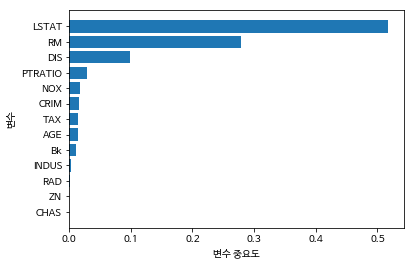

In [23]:
# 변수 중요도 수평 바
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

## 변수 간 상관관계
- 설명변수를 범주별로 분류

    1) 주거 환경: (+) 찰스강 조망, 재산세율
            (-) 범죄율, 산화질소 농도, 교사 1명당 학생 수, 비소매업 산업용지 비중
    
    2) 주택 특성: (+) 평균 주거용지 비중, 주택 평균 크기(방 개수)
            (-) 주택 노후도(자가 주택 중 1940년 이전에 지어진 주택의 비중)
    
    3) 주민 특성: 흑인 거주민 비중, 저소득층 비중

    4) 접근성: (+) 주요 업무지역과의 거리, 방사형 고속도로 접근지수


- 각 범주별로 목표변수 및 변수 간 상관도 검토
### Log-scale variables
- 선형회귀 모형에 들어갈 변수 형태를 고려하여 일부 변수는 자연로그로 변환
- 로그 변환 대상 변수: 주택가, 중심가로부터 거리, 고속도로 접근지수 
- 로그 변환된 변수는 회귀계수 검토시 변화율로 해석

In [24]:
df_short['ln_MEDV'] = np.log(df_short['MEDV'])
df_short['ln_DIS'] = np.log(df_short['DIS'])

df_short.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT,ln_MEDV,ln_DIS
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,0.0000,4.98,3.178054,1.408545
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,0.0000,9.14,3.072693,1.602836
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,0.3238,4.03,3.546740,1.602836
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,0.1804,2.94,3.508556,1.802073
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,0.0000,5.33,3.589059,1.802073


### 주거 환경

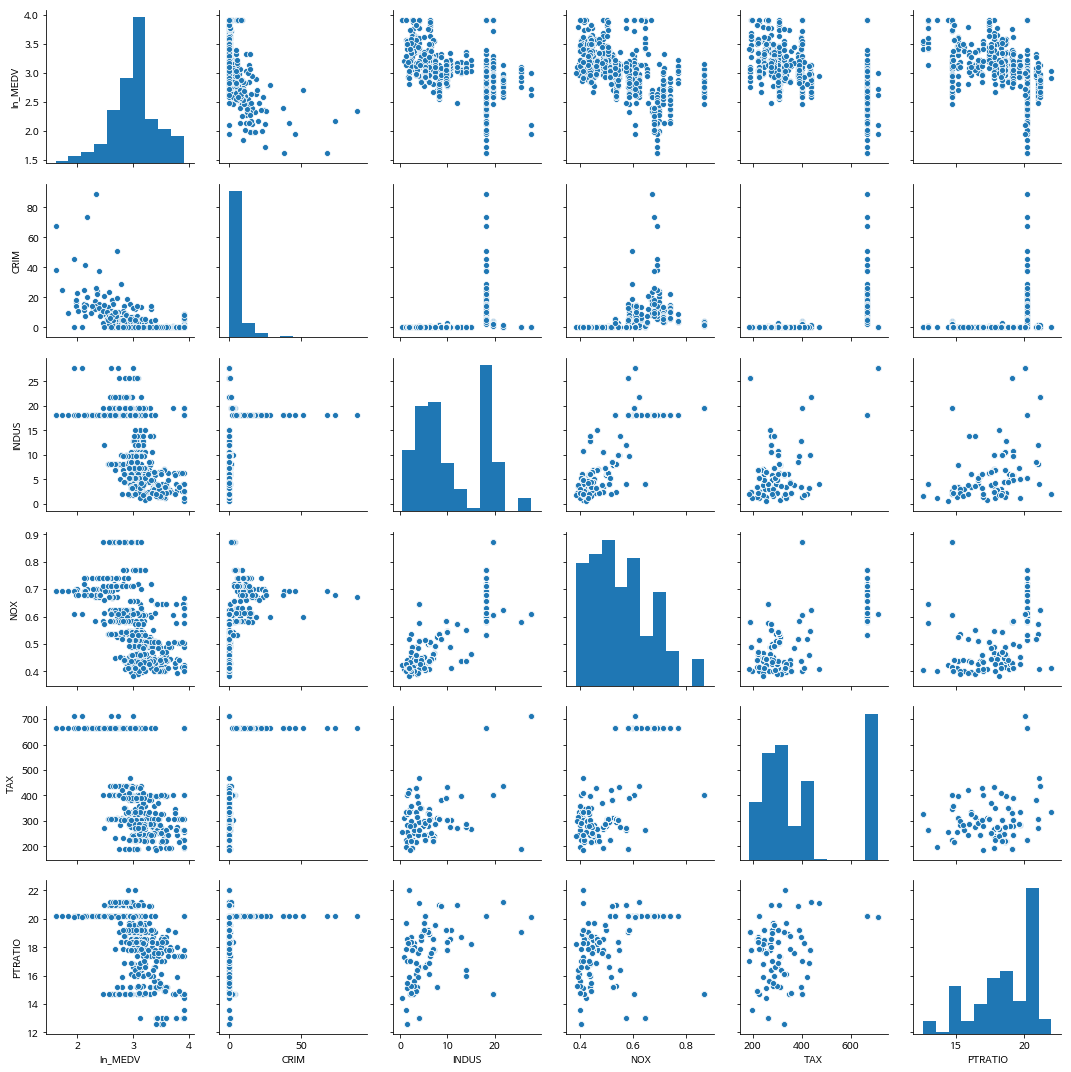

In [25]:
sns.pairplot(vars=['ln_MEDV', 'CRIM', 'INDUS', 'NOX', 'TAX', 'PTRATIO'], data=df_short)

### 주택 특성

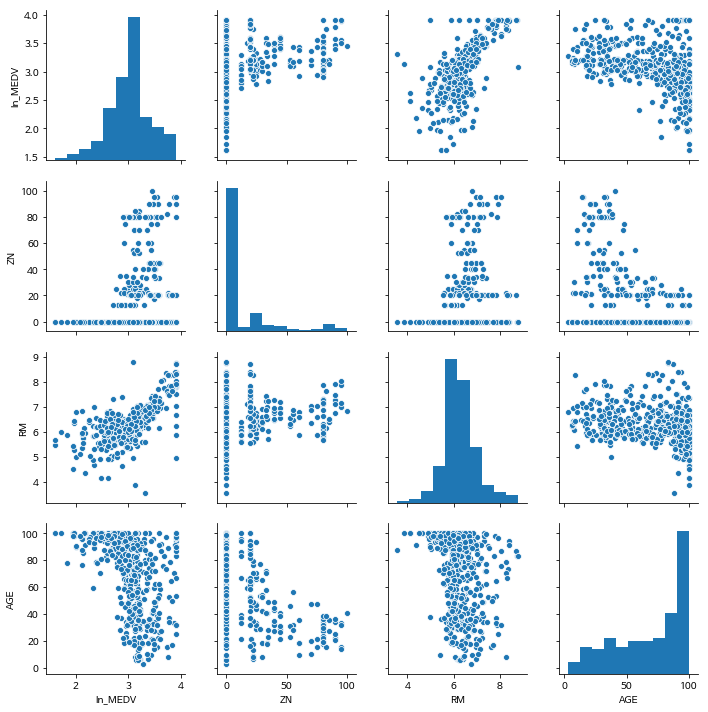

In [26]:
sns.pairplot(vars=['ln_MEDV', 'ZN', 'RM', 'AGE'], data=df_short)

### 주민 특성 및 접근성

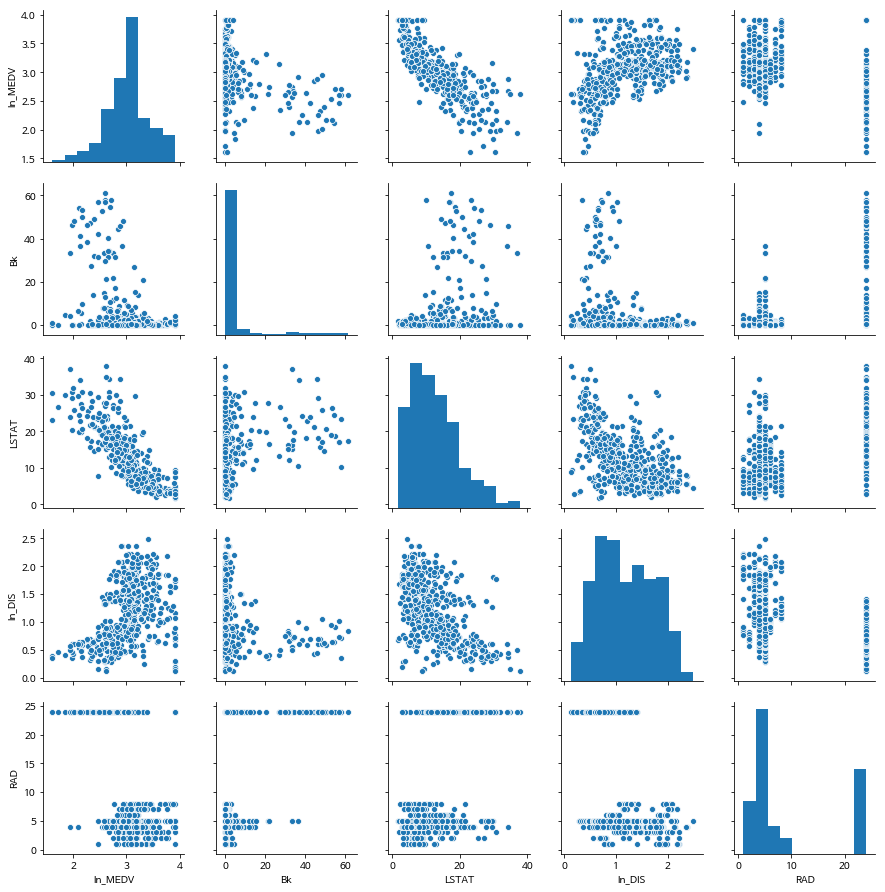

In [27]:
sns.pairplot(vars=['ln_MEDV', 'Bk', 'LSTAT', 'ln_DIS', 'RAD'], data=df_short)

In [28]:
# RAD 변수는 범주형처럼 보임 -> Unique method로 고유한 수치 확인 
df_short.RAD.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [29]:
# RAD==24인 구역에 관측치 집중, 기초통계량 확인
df_short.query('RAD==24').describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT,ln_MEDV,ln_DIS
count,132.000,132.000,132.0,132.0,132.000,132.000,132.000,132.000,132.000,132.0,132.0,132.0,132.000,132.000,132.000,132.000
mean,16.404,12.759,0.0,18.1,0.061,0.672,6.022,89.805,2.061,24.0,666.0,20.2,12.755,18.601,2.693,0.682
std,8.540,13.041,0.0,0.0,0.240,0.061,0.718,12.626,0.618,0.0,0.0,0.0,18.948,6.905,0.447,0.286
min,5.000,2.379,0.0,18.1,0.000,0.532,3.561,40.300,1.130,24.0,666.0,20.2,0.000,2.960,1.609,0.122
25%,11.225,5.686,0.0,18.1,0.000,0.614,5.713,85.925,1.589,24.0,666.0,20.2,0.128,14.175,2.418,0.463
50%,14.400,9.085,0.0,18.1,0.000,0.693,6.176,94.400,1.943,24.0,666.0,20.2,1.866,17.910,2.667,0.664
75%,19.900,14.334,0.0,18.1,0.000,0.713,6.419,98.825,2.431,24.0,666.0,20.2,22.174,23.045,2.991,0.888
max,50.000,88.976,0.0,18.1,1.000,0.770,8.780,100.000,4.098,24.0,666.0,20.2,61.211,37.970,3.912,1.411


In [30]:
df_short.query('TAX==666').describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT,ln_MEDV,ln_DIS
count,132.000,132.000,132.0,132.0,132.000,132.000,132.000,132.000,132.000,132.0,132.0,132.0,132.000,132.000,132.000,132.000
mean,16.404,12.759,0.0,18.1,0.061,0.672,6.022,89.805,2.061,24.0,666.0,20.2,12.755,18.601,2.693,0.682
std,8.540,13.041,0.0,0.0,0.240,0.061,0.718,12.626,0.618,0.0,0.0,0.0,18.948,6.905,0.447,0.286
min,5.000,2.379,0.0,18.1,0.000,0.532,3.561,40.300,1.130,24.0,666.0,20.2,0.000,2.960,1.609,0.122
25%,11.225,5.686,0.0,18.1,0.000,0.614,5.713,85.925,1.589,24.0,666.0,20.2,0.128,14.175,2.418,0.463
50%,14.400,9.085,0.0,18.1,0.000,0.693,6.176,94.400,1.943,24.0,666.0,20.2,1.866,17.910,2.667,0.664
75%,19.900,14.334,0.0,18.1,0.000,0.713,6.419,98.825,2.431,24.0,666.0,20.2,22.174,23.045,2.991,0.888
max,50.000,88.976,0.0,18.1,1.000,0.770,8.780,100.000,4.098,24.0,666.0,20.2,61.211,37.970,3.912,1.411


In [31]:
df_short.query('ZN==0').describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT,ln_MEDV,ln_DIS
count,372.000,372.000,372.0,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000,372.000
mean,20.473,4.868,0.0,13.542,0.075,0.591,6.148,77.717,2.954,11.376,449.183,19.058,5.741,14.447,2.939,0.989
std,8.588,9.733,0.0,6.323,0.264,0.108,0.673,23.554,1.331,9.452,176.850,1.816,12.997,7.149,0.405,0.431
min,5.000,0.025,0.0,1.890,0.000,0.413,3.561,2.900,1.130,1.000,188.000,14.700,0.000,1.730,1.609,0.122
25%,14.900,0.141,0.0,8.140,0.000,0.507,5.840,65.275,1.908,4.000,296.000,17.900,0.065,9.410,2.701,0.646
50%,19.750,0.699,0.0,18.100,0.000,0.581,6.120,87.300,2.558,5.000,403.000,20.200,0.492,13.550,2.983,0.939
75%,23.100,5.976,0.0,18.100,0.000,0.679,6.422,96.000,3.790,24.000,666.000,20.200,3.070,18.132,3.140,1.332
max,50.000,88.976,0.0,27.740,1.000,0.871,8.780,100.000,8.014,24.000,711.000,21.200,61.211,37.970,3.912,2.081


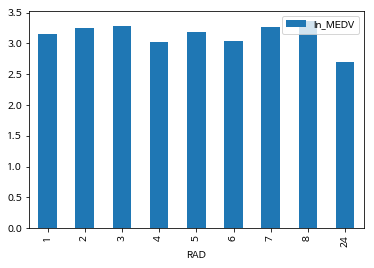

In [32]:
# 총 9개 수치(1~8, 24) 확인. 각 범주별 평균 MEDV 확인
df_MEDV_by_RAD = df_short[['ln_MEDV', 'RAD']].groupby('RAD').mean()
df_MEDV_by_RAD.plot.bar()

In [33]:
# 1~3, 4~6, 7~8, 24 로 구분
replace_map = {1: 0, 2: 0, 3: 0,
               4: 0, 5: 0, 6: 0,
               7: 0, 8: 0,
               24: 1}

#labels = df_short['RAD'].astype('category').cat.categories.tolist()
#replace_map_comp = {'RAD' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
# print(replace_map_comp)
print(replace_map)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 24: 1}


In [34]:
df_short['cat_RAD'] = df_short['RAD'].map(replace_map)
df_short.tail(20)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT,ln_MEDV,ln_DIS,cat_RAD
486,19.100000,5.69175,0.0,18.10,0,0.583,6.114,79.800003,3.5459,24,666,20.200001,0.3358,14.980000,2.949688,1.265792,1
487,20.600000,4.83567,0.0,18.10,0,0.583,5.905,53.200001,3.1523,24,666,20.200001,0.6927,11.450000,3.025291,1.148132,1
488,15.200000,0.15086,0.0,27.74,0,0.609,5.454,92.699997,1.8209,4,711,20.100000,0.1438,18.059999,2.721295,0.599331,0
489,7.000000,0.18337,0.0,27.74,0,0.609,5.414,98.300003,1.7554,4,711,20.100000,4.3442,23.969999,1.945910,0.562697,0
490,8.100000,0.20746,0.0,27.74,0,0.609,5.093,98.000000,1.8226,4,711,20.100000,6.5704,29.680000,2.091864,0.600264,0
491,13.600000,0.10574,0.0,27.74,0,0.609,5.983,98.800003,1.8681,4,711,20.100000,0.5412,18.070000,2.610070,0.624922,0
492,20.100000,0.11132,0.0,27.74,0,0.609,5.983,83.500000,2.1099,4,711,20.100000,0.0000,13.350000,3.000720,0.746641,0
493,21.799999,0.17331,0.0,9.69,0,0.585,5.707,54.000000,2.3817,6,391,19.200001,0.0000,12.010000,3.081910,0.867815,0
494,24.500000,0.27957,0.0,9.69,0,0.585,5.926,42.599998,2.3817,6,391,19.200001,0.0000,13.590000,3.198673,0.867815,0
495,23.100000,0.17899,0.0,9.69,0,0.585,5.670,28.799999,2.7986,6,391,19.200001,0.2872,17.600000,3.139833,1.029119,0


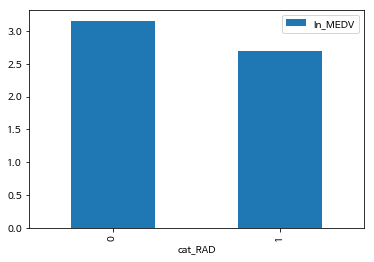

In [35]:
# 1~8은 0으로, 24는 1로 변환. 각 범주별 평균 MEDV 확인
df_MEDV_by_RADcat = df_short[['ln_MEDV', 'cat_RAD']].groupby('cat_RAD').mean()
df_MEDV_by_RADcat.plot.bar()

# 선형회귀분석
## 전체 표본에 대한 회귀분석

In [42]:
# smf.ols(formula="Y ~ X1 X2 X3", data): 회귀식 설정
reg_model = smf.ols(formula="np.log(MEDV) ~ C(CHAS) + CRIM + NOX  + RM + LSTAT + C(cat_RAD) + np.log(DIS) + Bk",
                    data = df_short)
# .fit(): get fitted values from the model -> reg_result
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     193.8
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          1.89e-147
Time:                        23:09:52   Log-Likelihood:                 93.363
No. Observations:                 506   AIC:                            -168.7
Df Residuals:                     497   BIC:                            -130.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.3014      0.168     

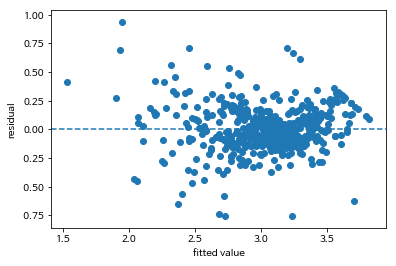

In [44]:
# 잔차 산점도
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value'); plt.ylabel('residual')
plt.axhline(y=0, linestyle='--')

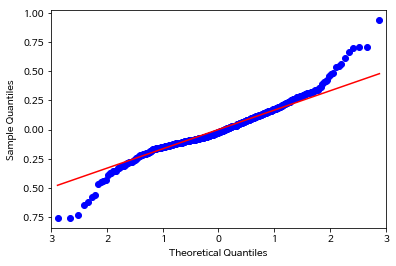

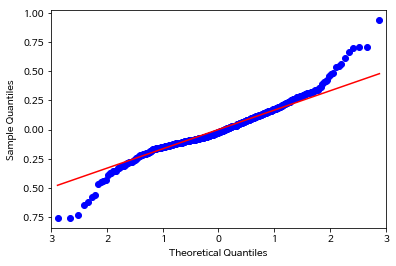

In [48]:
# 정규성 검정
qqplot(reg_result.resid, line='q')

In [68]:
# 다중공선성 확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_ind = df_short[['CHAS', 'CRIM', 'NOX', 'RM', 'LSTAT', 'cat_RAD', 'ln_DIS', 'Bk']]
df_ind = add_constant(df_ind)

# VIF DataFrame
df_vif = pd.DataFrame()
df_vif['variable'] = df_ind.columns
df_vif['VIF'] = [variance_inflation_factor(df_ind.values, i) for i in range(df_ind.shape[1])]

# VIF순으로 정렬
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,CHAS,1.044
8,Bk,1.318
4,RM,1.672
2,CRIM,1.834
6,cat_RAD,2.267
5,LSTAT,2.570
7,ln_DIS,3.513
3,NOX,3.868
0,const,347.735


## 백인 밀집 구역, 혼합 구역 비교
### 백인 밀집 구역

In [71]:
# smf.ols(formula="Y ~ X1 X2 X3", data): 회귀식 설정
reg_model = smf.ols(formula="np.log(MEDV) ~ C(CHAS) + CRIM + INDUS + NOX + PTRATIO + RM + LSTAT + C(cat_RAD) + np.log(DIS)",
                    data = df_short.query('Bk==0'))
# .fit(): get fitted values from the model -> reg_result
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     46.62
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           1.10e-33
Time:                        23:34:55   Log-Likelihood:                 33.388
No. Observations:                 121   AIC:                            -46.78
Df Residuals:                     111   BIC:                            -18.82
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.6254      0.532     

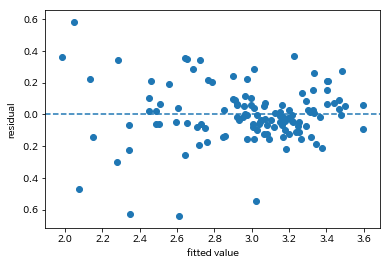

In [73]:
# 잔차 산점도
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value'); plt.ylabel('residual')
plt.axhline(y=0, linestyle='--')

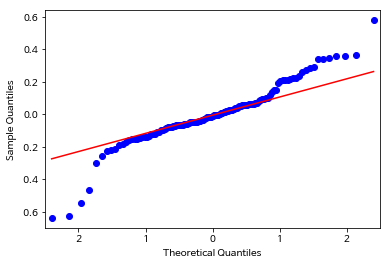

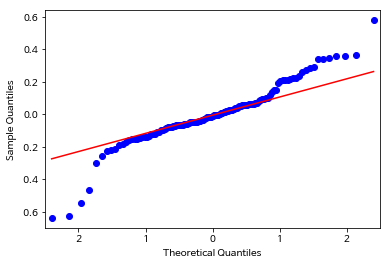

In [75]:
# 정규성 검정
qqplot(reg_result.resid, line='q')

In [86]:
# 다중공선성 확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_ind = df_short.query('Bk==0')
df_ind = df_ind[['CHAS', 'CRIM', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'LSTAT', 'cat_RAD', 'ln_DIS']]
df_ind = add_constant(df_ind)

# VIF DataFrame
df_vif = pd.DataFrame()
df_vif['variable'] = df_ind.columns
df_vif['VIF'] = [variance_inflation_factor(df_ind.values, i) for i in range(df_ind.shape[1])]

# VIF순으로 정렬
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,CHAS,1.112
5,PTRATIO,1.455
2,CRIM,1.953
6,RM,2.701
8,cat_RAD,2.984
3,INDUS,3.661
7,LSTAT,5.000
9,ln_DIS,5.343
4,NOX,6.366
0,const,933.273


### 혼합 구역

In [87]:
# smf.ols(formula="Y ~ X1 X2 X3", data): 회귀식 설정
reg_model = smf.ols(formula="np.log(MEDV) ~ C(CHAS) + CRIM + INDUS + NOX + PTRATIO + RM + LSTAT + C(cat_RAD) + np.log(DIS)",
                    data = df_short.query('Bk>0'))
# .fit(): get fitted values from the model -> reg_result
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.9
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          3.88e-122
Time:                        23:43:32   Log-Likelihood:                 100.71
No. Observations:                 385   AIC:                            -181.4
Df Residuals:                     375   BIC:                            -141.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.5643      0.225     

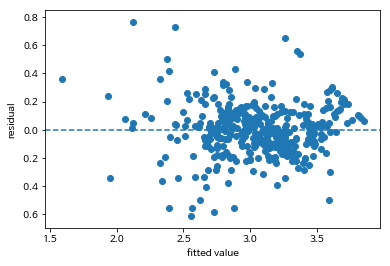

In [89]:
# 잔차 산점도
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value'); plt.ylabel('residual')
plt.axhline(y=0, linestyle='--')

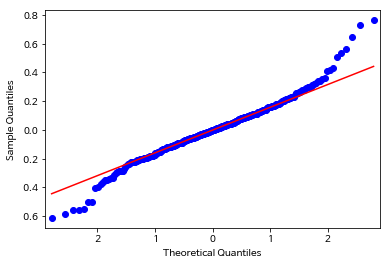

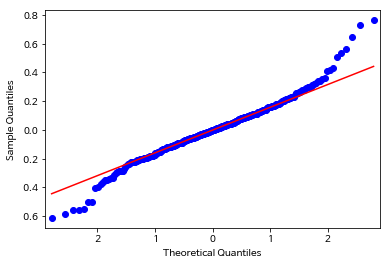

In [91]:
# 정규성 검정
qqplot(reg_result.resid, line='q')

In [92]:
# 다중공선성 확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_ind = df_short.query('Bk>0')
df_ind = df_ind[['CHAS', 'CRIM', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'LSTAT', 'cat_RAD', 'ln_DIS']]
df_ind = add_constant(df_ind)

# VIF DataFrame
df_vif = pd.DataFrame()
df_vif['variable'] = df_ind.columns
df_vif['VIF'] = [variance_inflation_factor(df_ind.values, i) for i in range(df_ind.shape[1])]

# VIF순으로 정렬
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,CHAS,1.054
6,RM,1.681
5,PTRATIO,1.736
2,CRIM,1.848
7,LSTAT,2.284
8,cat_RAD,2.784
3,INDUS,3.345
9,ln_DIS,3.770
4,NOX,4.071
0,const,544.791


## 문제의 지역

In [39]:
reg_model = smf.ols(formula="np.log(MEDV) ~ C(CHAS) + CRIM + NOX + ZN + RM + np.square(RM) + LSTAT + np.log(DIS) + Bk",
                    data = df_short.query('RAD==24'))
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     39.40
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           1.88e-30
Time:                        22:41:39   Log-Likelihood:                 3.4111
No. Observations:                 132   AIC:                             11.18
Df Residuals:                     123   BIC:                             37.12
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6802      0.765      7.422

In [40]:
reg_model = smf.ols(formula="np.log(MEDV) ~ C(CHAS) + CRIM + NOX + ZN + RM + np.square(RM) + LSTAT + np.log(DIS) + Bk",
                    data = df_short.query('RAD!=24'))
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     179.1
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          6.79e-128
Time:                        22:41:39   Log-Likelihood:                 216.26
No. Observations:                 374   AIC:                            -412.5
Df Residuals:                     364   BIC:                            -373.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.9386      0.611      6.450